<a href="https://colab.research.google.com/github/davidtcliffe/altdeepTransportModel/blob/main/altdeep_causal_transport_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Altdeep causalML course assignment: Modeling with DAG's
### Causality and Probabilistic Graphical Models's
#### Install packages and import modules

In [8]:
!pip install torch torchvision torchaudio
!pip3 install pyro-ppl
!pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.0 MB/s 


In [38]:
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator
import networkx as nx
import matplotlib.pyplot as plt


## Draw Transport DAG 

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


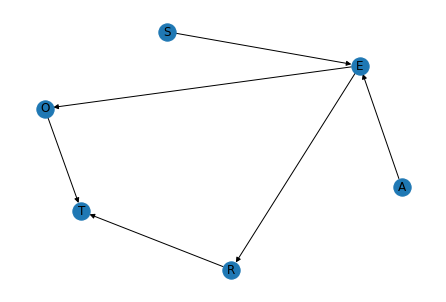

In [50]:
model = BayesianModel(
    [
        ('A', 'E'),
        ('S', 'E'),
        ('E', 'O'),
        ('E', 'R'),
        ('O', 'T'),
        ('R', 'T')
    ]
)
nx.draw(model, with_labels=True)
plt.show()



## Import Data from url 

In [40]:
survey_url = "https://raw.githubusercontent.com/altdeep/causalML/master/datasets/transportation_survey.csv"
data = pd.read_csv(survey_url)
print(data)

         A  S     E    O      R      T
0    adult  F  high  emp  small  train
1    young  M  high  emp    big    car
2    adult  M   uni  emp    big  other
3      old  F   uni  emp    big    car
4    young  F   uni  emp    big    car
..     ... ..   ...  ...    ...    ...
495  young  M  high  emp    big  other
496  adult  M  high  emp    big    car
497  young  M  high  emp  small  train
498  young  M  high  emp  small    car
499  adult  M  high  emp  small  other

[500 rows x 6 columns]




## Fit model to data 

In [41]:
estimator = BayesianEstimator(model, data)



### Estimate the model pseudocounts (CPD's) for two variables

In [62]:
cpd_E = estimator.estimate_cpd('E', prior_type="dirichlet", pseudo_counts=[[1,1,1,1,1,1],[2, 2, 2, 2, 2, 2]])
print(cpd_E)

+---------+---------------------+-----+---------------------+
| A       | A(adult)            | ... | A(young)            |
+---------+---------------------+-----+---------------------+
| S       | S(F)                | ... | S(M)                |
+---------+---------------------+-----+---------------------+
| E(high) | 0.5137614678899083  | ... | 0.7580645161290323  |
+---------+---------------------+-----+---------------------+
| E(uni)  | 0.48623853211009177 | ... | 0.24193548387096775 |
+---------+---------------------+-----+---------------------+


In [58]:
cpd_T = estimator.estimate_cpd('T', prior_type="dirichlet", pseudo_counts=[[1,1,1,1],[2, 2, 2, 2], [3, 3, 3, 3]])
print(cpd_T)

+----------+---------------------+-----+---------------------+
| O        | O(emp)              | ... | O(self)             |
+----------+---------------------+-----+---------------------+
| R        | R(big)              | ... | R(small)            |
+----------+---------------------+-----+---------------------+
| T(car)   | 0.6956521739130435  | ... | 0.2857142857142857  |
+----------+---------------------+-----+---------------------+
| T(other) | 0.13768115942028986 | ... | 0.2857142857142857  |
+----------+---------------------+-----+---------------------+
| T(train) | 0.16666666666666666 | ... | 0.42857142857142855 |
+----------+---------------------+-----+---------------------+
